In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv("/content/drive/MyDrive/Apple Dataset.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10954 entries, 0 to 10953
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10954 non-null  object 
 1   Open       10954 non-null  float64
 2   High       10954 non-null  float64
 3   Low        10954 non-null  float64
 4   Close      10954 non-null  float64
 5   Adj Close  10954 non-null  float64
 6   Volume     10954 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 599.2+ KB


,Date,Open,High,Low,Close,Adj Close,Volume
0,12/12/1980,0.128348,0.128906,0.128348,0.128348,0.099058,469033600
1,12/15/1980,0.122210,0.122210,0.121652,0.121652,0.093890,175884800
2,12/16/1980,0.113281,0.113281,0.112723,0.112723,0.086999,105728000
3,12/17/1980,0.115513,0.116071,0.115513,0.115513,0.089152,86441600
4,12/18/1980,0.118862,0.119420,0.118862,0.118862,0.091737,73449600


In [ ]:
# convert format Date
df["Date"] = pd.to_datetime(df['Date'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10954 entries, 0 to 10953
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       10954 non-null  datetime64[ns]
 1   Open       10954 non-null  float64       
 2   High       10954 non-null  float64       
 3   Low        10954 non-null  float64       
 4   Close      10954 non-null  float64       
 5   Adj Close  10954 non-null  float64       
 6   Volume     10954 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 599.2 KB


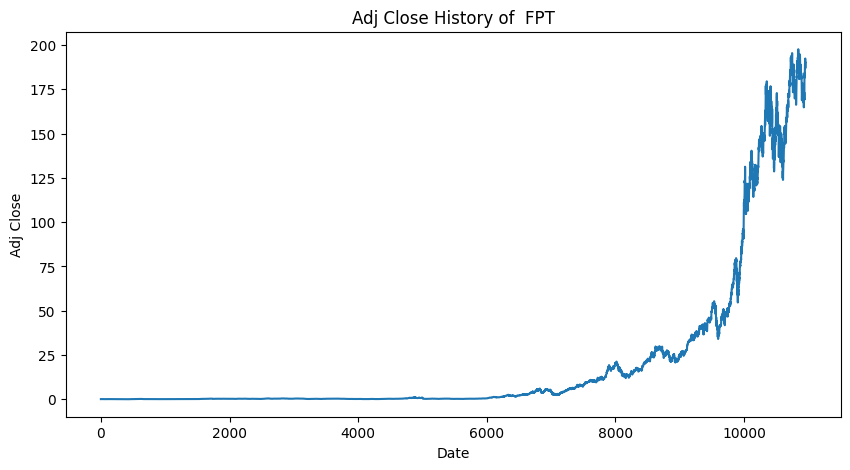

In [ ]:
def plot_graph(figsize,df, column_name):
  plt.figure(figsize=figsize)
  plt.plot(df)
  plt.title(f'{column_name} History of  FPT')
  plt.xlabel("Date")
  plt.ylabel(column_name)
  plt.show()

plot_graph((10,5),df['Adj Close'], "Adj Close")


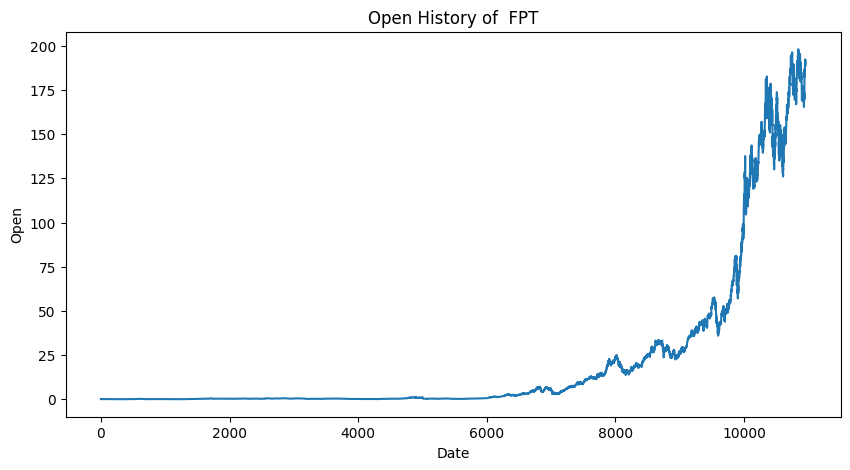

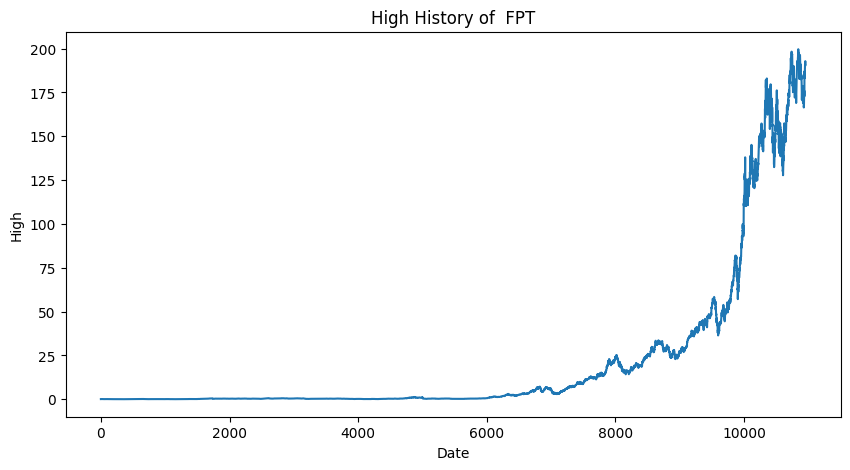

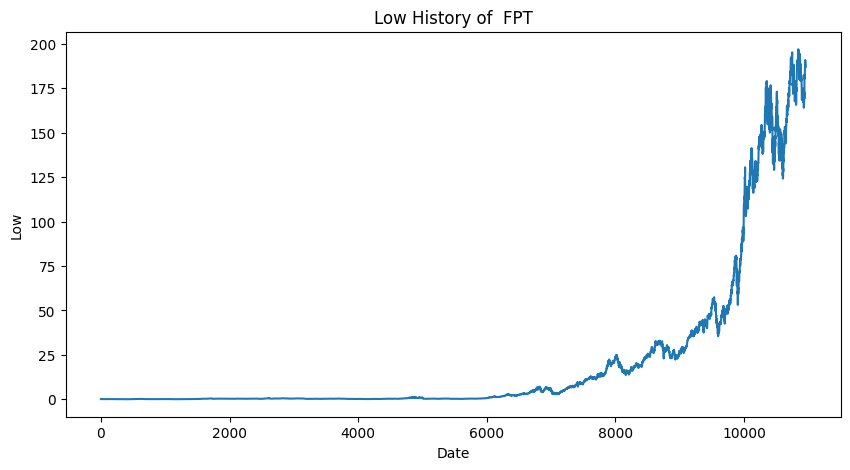

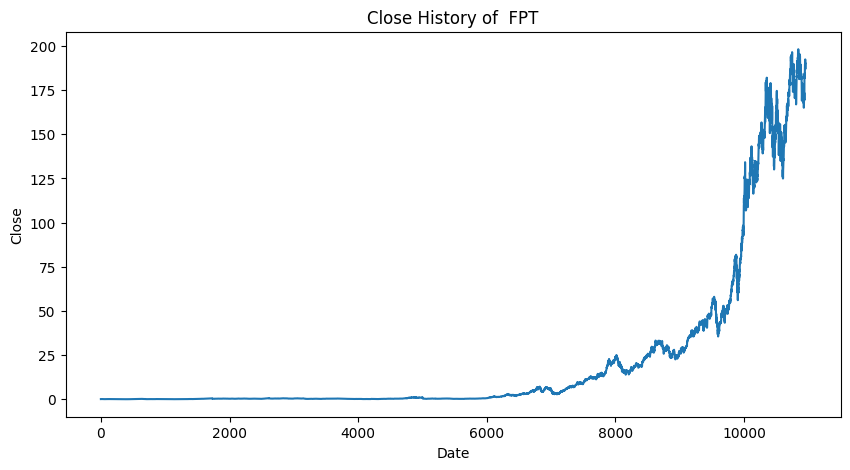

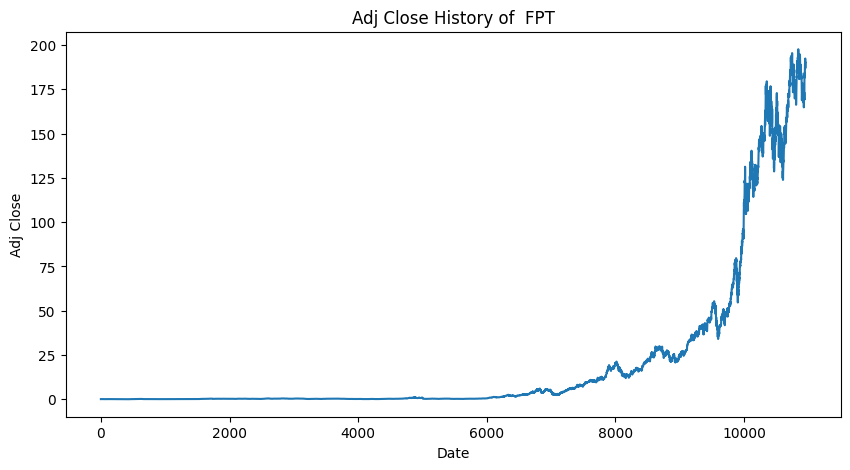

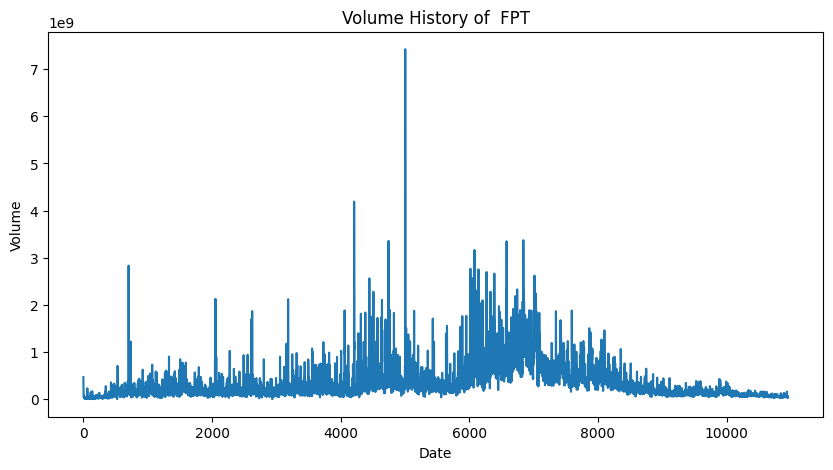

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
for i in df.columns:
  if i != 'Date':
    plot_graph((10,5),df[i],i)
df.columns

In [ ]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,10954,10954.000000,10954.000000,10954.000000,10954.000000,10954.000000,1.095400e+04
mean,2002-08-25 16:15:41.245207296,21.530877,21.761904,21.308220,21.544072,20.747506,3.190792e+08
min,1980-12-12 00:00:00,0.049665,0.049665,0.049107,0.049107,0.037900,0.000000e+00
25%,1991-10-11 18:00:00,0.296875,0.303571,0.290179,0.296875,0.241624,1.139936e+08
50%,2002-08-21 12:00:00,0.522321,0.533482,0.513393,0.524554,0.427333,2.067128e+08
75%,2013-07-09 18:00:00,19.767500,19.888572,19.457768,19.682679,17.048054,3.993444e+08
max,2024-05-24 00:00:00,198.020004,199.619995,197.000000,198.110001,197.589523,7.421641e+09
std,NaN,44.458386,44.931856,44.013578,44.492483,44.038943,3.357446e+08


# Mục mới

In [ ]:
data= pd.DataFrame()
df["MA_for_250_day"]= df["Adj Close"].rolling(250).mean()
data["MA_for_250_day"]= df["MA_for_250_day"]
data["Date"]=df["Date"]
data

,MA_for_250_day,Date
0,NaN,1980-12-12
1,NaN,1980-12-15
2,NaN,1980-12-16
3,NaN,1980-12-17
4,NaN,1980-12-18
...,...,...
10949,181.420285,2024-05-20
10950,181.507070,2024-05-21
10951,181.586941,2024-05-22
10952,181.646157,2024-05-23


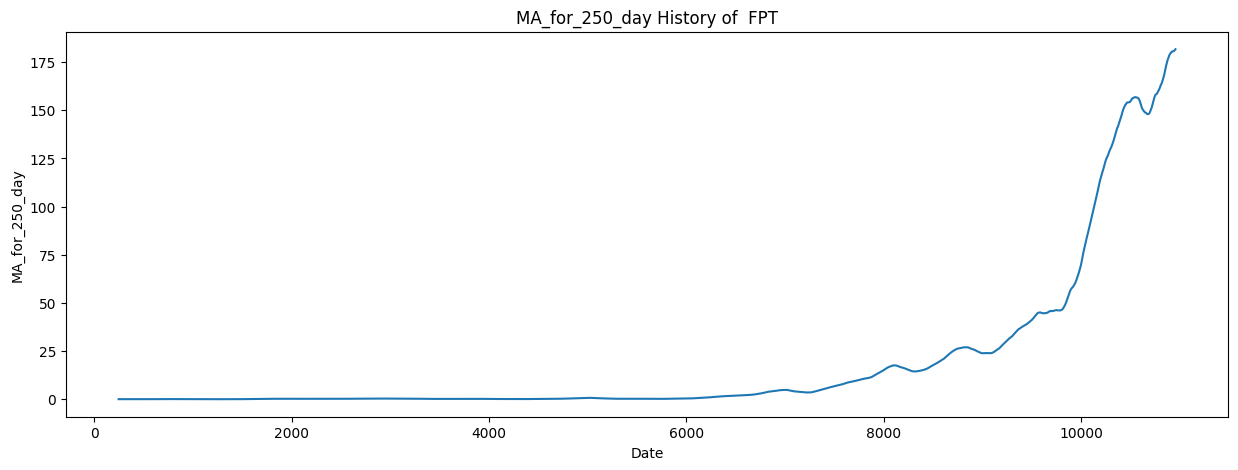

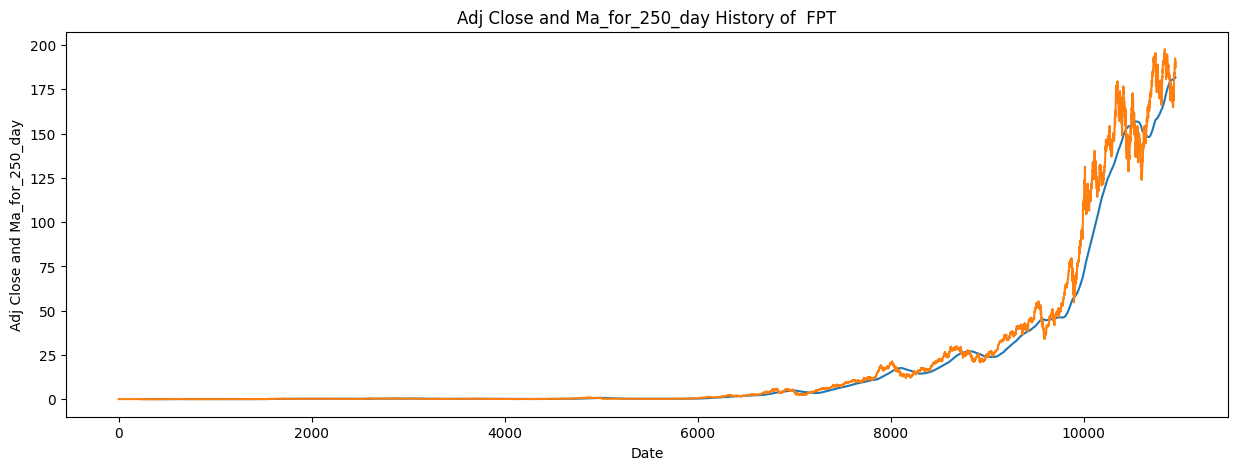

In [ ]:
plot_graph((15,5),data["MA_for_250_day"], "MA_for_250_day")
plot_graph((15,5),df[["MA_for_250_day","Adj Close"]], "Adj Close and Ma_for_250_day")

In [ ]:
df_Adj_close= df["Adj Close"]
df_Adj_close.max(), df_Adj_close.min()
np.array(df_Adj_close)

array([9.90580000e-02, 9.38900000e-02, 8.69990000e-02, ...,
       1.90899994e+02, 1.86880005e+02, 1.89979996e+02])

In [ ]:
#0- 1
from sklearn.preprocessing import MinMaxScaler
Scale= MinMaxScaler(feature_range=(0,1))
scale_data= Scale.fit_transform(np.array(df_Adj_close).reshape(-1,1))
scale_data.min(), scale_data.max()
scale_data

array([[3.09579841e-04],
       [2.83419590e-04],
       [2.48537568e-04],
       ...,
       [9.66137818e-01],
       [9.45788762e-01],
       [9.61480818e-01]])

In [ ]:
x_data=[]
y_data=[]
for i in range(250, scale_data.shape[0]):
  x_data.append(scale_data[i-250:i,0])
  y_data.append(scale_data[i,0])
x_data
y_data

[0.00013734637857164045,
 0.00013734637857164045,
 0.0001351697323185241,
 0.00012426625318082043,
 0.0001329880240973773,
 0.00014824985770934412,
 0.00017659181671213095,
 0.00020711548393606457,
 0.00018967194210295097,
 0.0001962120047983609,
 0.00018749023388180412,
 0.00018967194210295097,
 0.00017223346223786782,
 0.0001787735249332778,
 0.00019403029657721405,
 0.00019403029657721405,
 0.00019185365032409776,
 0.00017223346223786782,
 0.00016787004579557412,
 0.00013952808679278724,
 0.0001547899204047541,
 0.0001329880240973773,
 0.00012208960692770414,
 0.0001199078987065573,
 0.0001351697323185241,
 0.00015697162862590095,
 0.00016351169132131093,
 0.0001547899204047541,
 0.00016132998310016414,
 0.00016787004579557412,
 0.00017005175401672097,
 0.0001591533368470478,
 0.00014607321145622778,
 0.00014824985770934412,
 0.0001591533368470478,
 0.00016351169132131093,
 0.0001591533368470478,
 0.00016132998310016414,
 0.00016132998310016414,
 0.00015261327415163776,
 0.000152613

In [ ]:
x_data[0], y_data[0]

(array([3.09579841e-04, 2.83419590e-04, 2.48537568e-04, 2.59435985e-04,
        2.72521173e-04, 3.00858070e-04, 3.24836612e-04, 3.46643571e-04,
        3.74980468e-04, 4.27306031e-04, 4.36022740e-04, 4.20765969e-04,
        4.03327489e-04, 4.09867551e-04, 3.96787426e-04, 3.70622113e-04,
        3.46643571e-04, 3.35740092e-04, 3.64082051e-04, 3.59723696e-04,
        3.40103508e-04, 3.42280154e-04, 3.53183633e-04, 3.48820217e-04,
        3.81520530e-04, 3.64082051e-04, 3.74980468e-04, 3.81520530e-04,
        3.79343884e-04, 3.70622113e-04, 3.66263759e-04, 3.48820217e-04,
        3.29200029e-04, 3.00858070e-04, 2.72521173e-04, 2.89959653e-04,
        3.07398133e-04, 3.07398133e-04, 3.09579841e-04, 2.83419590e-04,
        2.83419590e-04, 2.68157756e-04, 2.63794340e-04, 2.52895923e-04,
        2.63794340e-04, 2.83419590e-04, 2.55072569e-04, 2.31094026e-04,
        2.37634089e-04, 2.22377318e-04, 2.48537568e-04, 2.55072569e-04,
        2.70339465e-04, 2.72521173e-04, 2.65981110e-04, 2.616126

In [ ]:
# x_test , y_test = 0.3 , y_train , x_train= 0.7
len_x= int(len(x_data)*0.7)
len_y= int(len(y_data)*0.7)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=42)

In [ ]:
x_train= np.array(x_train)
x_test= np.array(x_test)
y_train= np.array(y_train)
y_test= np.array(y_test)


In [ ]:
# more 1 column
x_train= np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_test= np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
model= Sequential()
model.add(LSTM(units= 128, return_sequences= True, input_shape= (x_train.shape[1],4)))
model.add(LSTM(units= 64, return_sequences= True, dropout=0.2, activation="relu"))
model.add(LSTM(units= 32, return_sequences= False,activation='tanh'))
model.add(Dense(64, activation="softmax"))
model.add(Dropout(0.2))
model.add(Dense(1))
model.summary()
# 4* 128 * 130= 66,560

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 250, 128)            │          68,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 250, 64)             │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_8 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 132,097 (516.00 KB)

 Trainable params: 132,097 (516.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(x_train, y_train, epochs=2, batch_size=32)


Epoch 1/2
235/235 ━━━━━━━━━━━━━━━━━━━━ 104s 432ms/step - loss: nan
Epoch 2/2
235/235 ━━━━━━━━━━━━━━━━━━━━ 110s 469ms/step - loss: nan


In [ ]:
from sklearn.metrics import accuracy_score
y_pred= model.predict(x_test)
x_test.shape
y_pred.shape

101/101 ━━━━━━━━━━━━━━━━━━━━ 14s 132ms/step


(3212, 1)

In [ ]:
y_test.shape

(3212,)

In [ ]:
inv_y_predicts=Scale.inverse_transform( y_pred )
inv_y_test=Scale.inverse_transform( y_test.reshape(-1, y_pred.shape[-1]))


In [ ]:
print(inv_y_predicts.shape)
print(inv_y_test.shape)

(3212, 1)
(3212, 1)


In [ ]:
rmse= np.sqrt(np.mean((inv_y_predicts-inv_y_test)**2))
rmse

2.8412753904115737

In [ ]:
data_pre = pd.DataFrame({
    "date": df['Date'].iloc[len_x + 250: len_x + 250 + len(inv_y_test)],
    "y_test": inv_y_test.reshape(-1),
    "y_pred": inv_y_predicts.reshape(-1)
}, index=df.index[len_x + 250: len_x + 250 + len(inv_y_test)])

In [ ]:
data_pre[ data_pre["date"] == "2022-01-04"]

,date,y_test,y_pred
10353,2022-01-04,0.307519,1.388815


In [ ]:
model.save('model_apple.h5')

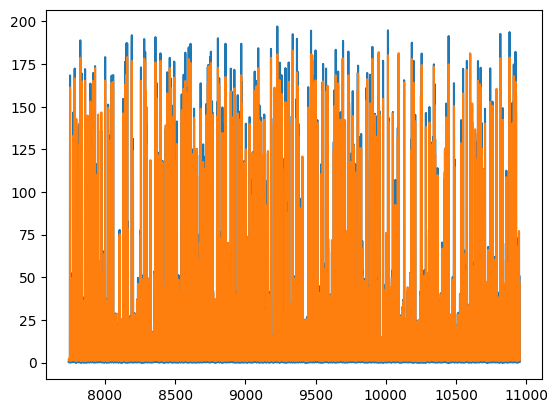

In [ ]:
plt.plot(data_pre["y_test"])
plt.plot(data_pre["y_pred"])
plt.show()
#